In [5]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

FILENAME = 'data/pima-indians-diabetes.csv'

In [3]:
# Fix random seed for reproducibility.
seed = 7
numpy.random.seed(seed)

In [6]:
# Load Pima indians dataset.
dataset = numpy.loadtxt(FILENAME, delimiter=',')
# Split into input (X) and output (Y) variables.
training_data = dataset[:, 0:8]
training_targets = dataset[:, 8]

In [8]:
#  Create model:
#   'relu' Activation function for input layer.
#   We use a 'sigmoid' activation function on the output layer to ensure our network output
#   is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification.
#   of either class with a default threshold of 0.5.
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(training_data, training_targets, epochs=150, batch_size=10)
scores = model.evaluate(training_data, training_targets)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

Epoch 1/150
768/768 [==============================] - 2s 3ms/step - loss: 0.6813 - accuracy: 0.6250
Epoch 2/150
768/768 [==============================] - 0s 364us/step - loss: 0.6653 - accuracy: 0.6536
Epoch 3/150
768/768 [==============================] - 0s 380us/step - loss: 0.6579 - accuracy: 0.6523
Epoch 4/150
768/768 [==============================] - 0s 426us/step - loss: 0.6485 - accuracy: 0.6589
Epoch 5/150
768/768 [==============================] - 0s 406us/step - loss: 0.6392 - accuracy: 0.6628
Epoch 6/150
768/768 [==============================] - 0s 355us/step - loss: 0.6223 - accuracy: 0.6589
Epoch 7/150
768/768 [==============================] - 0s 396us/step - loss: 0.6130 - accuracy: 0.6745
Epoch 8/150
768/768 [==============================] - 0s 384us/step - loss: 0.6028 - accuracy: 0.6862
Epoch 9/150
768/768 [==============================] - 0s 391us/step - loss: 0.6035 - accuracy: 0.6940
Epoch 10/150
768/768 [==============================] - 0s 439us/step - los

In [11]:
print(model.metrics_names)

['loss', 'accuracy']


In [87]:
## KMEANS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [88]:
dataframe = pd.read_csv(r"data/avocado.csv")
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [89]:
## Using AveragePrice, Region and TotalVolume
type(dataframe["AveragePrice"])
dataframe["AveragePrice"].shape

(18249,)

In [90]:
dataframe = dataframe[["AveragePrice", "region", "Total Volume"]]
dataframe.head()

,AveragePrice,region,Total Volume
0,1.33,Albany,64236.62
1,1.35,Albany,54876.98
2,0.93,Albany,118220.22
3,1.08,Albany,78992.15
4,1.28,Albany,51039.60


In [91]:
dataframe = dataframe.set_index("region")
dataframe.head()
dataframe = dataframe.drop(["SouthCentral", "Southeast", "TotalUS", "West"])
cities = dataframe.iloc["NewYork"]

TypeError: Cannot index by location index with a non-integer key

In [79]:
print(dataframe.groupby('region').size())
dataframe = dataframe.reset_index()
dataframe.head()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

,region,AveragePrice,Total Volume
0,Albany,1.33,64236.62
1,Albany,1.35,54876.98
2,Albany,0.93,118220.22
3,Albany,1.08,78992.15
4,Albany,1.28,51039.60


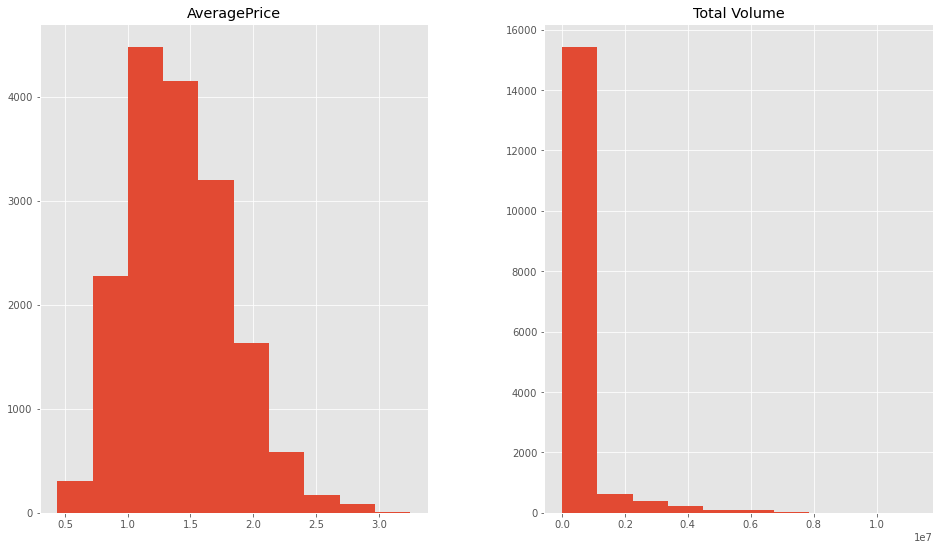

In [80]:
dataframe.drop(["region"],1).hist()
plt.show()

/Users/carooobregon/anaconda3/envs/computer-vision/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


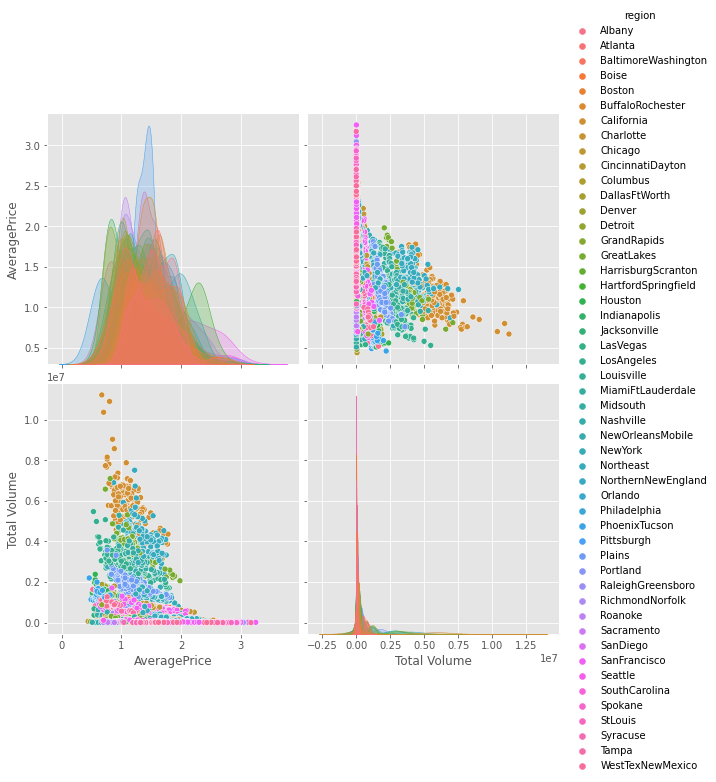

In [81]:
sb.pairplot(dataframe.dropna(), hue='region',size=4,vars=["AveragePrice","Total Volume"],kind='scatter')

In [82]:
dataframe.shape

(16897, 3)

In [ ]:
## New York
## San Francisco
## Houston 
## Philadephia
## PhoenixTucson